In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
math_file = '../data/interim/math.csv'
lang_file = '../data/interim/lang.csv'

math = pd.read_csv(math_file, index_col=0)
lang = pd.read_csv(lang_file, index_col=0)

In [38]:
print(f"Math: {math.shape}")
print(f"Language: {lang.shape}")

Math: (395, 33)
Language: (649, 33)


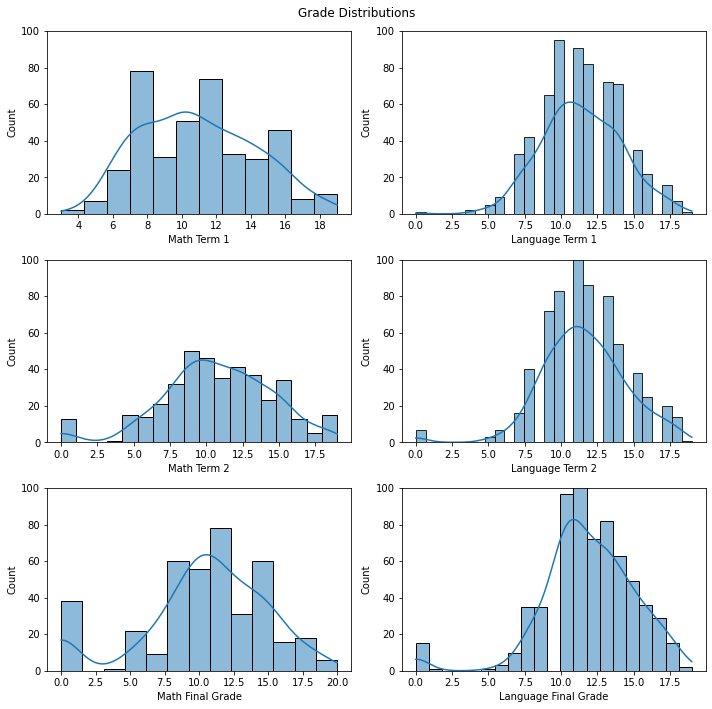

In [39]:
_ = plt.figure(figsize=(10,10))

_ = plt.subplot(3, 2, 1)
_ = sns.histplot(math['G1'], kde=True)
_ = plt.xlabel('Math Term 1')
_ = plt.ylim(0,100)

_ = plt.subplot(3, 2, 2)
_ = sns.histplot(lang['G1'], kde=True)
_ = plt.xlabel('Language Term 1')
_ = plt.ylim(0,100)

_ = plt.subplot(3, 2, 3)
_ = sns.histplot(math['G2'], kde=True)
_ = plt.xlabel('Math Term 2')
_ = plt.ylim(0,100)

_ = plt.subplot(3, 2, 4)
_ = sns.histplot(lang['G2'], kde=True)
_ = plt.xlabel('Language Term 2')
_ = plt.ylim(0,100)

_ = plt.subplot(3, 2, 5)
_ = sns.histplot(math['G3'], kde=True)
_ = plt.xlabel('Math Final Grade')
_ = plt.ylim(0,100)

_ = plt.subplot(3, 2, 6)
_ = sns.histplot(lang['G3'], kde=True)
_ = plt.xlabel('Language Final Grade')
_ = plt.ylim(0,100)

_ = plt.suptitle('Grade Distributions')
_ = plt.tight_layout()

plt.show()